In [1]:
import time
from datetime import datetime, timedelta, date
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI

In [2]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [3]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)

In [4]:
session = requests.session()

In [5]:
minute_history = api.polygon.historic_agg_v2(
    'NLNK', 1, 'minute', _from = date.today() - timedelta(days=10), to=date.today() + timedelta(days=1), limit=1000).df

In [23]:
minute_history[:992]

,open,high,low,close,volume
timestamp,,,,,
2020-01-03 14:46:00-05:00,2.2000,2.2025,2.2000,2.2025,600
2020-01-03 14:47:00-05:00,2.2000,2.2000,2.2000,2.2000,840
2020-01-03 14:49:00-05:00,2.1909,2.1909,2.1800,2.1800,2000
2020-01-03 14:50:00-05:00,2.1974,2.2100,2.1950,2.2100,1700
2020-01-03 15:01:00-05:00,2.2081,2.2081,2.2081,2.2081,1000
...,...,...,...,...,...
2020-01-09 14:53:00-05:00,2.2155,2.2155,2.2155,2.2155,1000
2020-01-09 14:54:00-05:00,2.2200,2.2200,2.2200,2.2200,102
2020-01-09 14:55:00-05:00,2.2101,2.2101,2.2101,2.2101,100


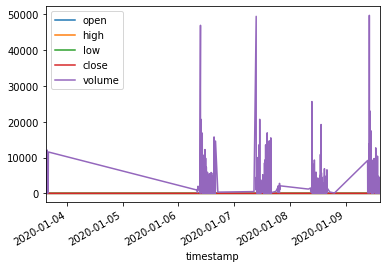

In [24]:
minute_history[:992].plot.line()

In [25]:
rsi = RSI(minute_history[:992]["close"].dropna(), 14)

In [26]:
rsi[-10:]

timestamp
2020-01-09 14:33:00-05:00    53.157792
2020-01-09 14:35:00-05:00    61.238862
2020-01-09 14:36:00-05:00    54.489845
2020-01-09 14:37:00-05:00    46.916878
2020-01-09 14:52:00-05:00    48.993803
2020-01-09 14:53:00-05:00    51.948726
2020-01-09 14:54:00-05:00    54.323485
2020-01-09 14:55:00-05:00    48.629435
2020-01-09 14:56:00-05:00    52.476667
2020-01-09 15:00:00-05:00    53.941631
dtype: float64

In [27]:
m = MACD(minute_history[:992]["close"].dropna())

In [28]:
m[0]

timestamp
2020-01-03 14:46:00-05:00         NaN
2020-01-03 14:47:00-05:00         NaN
2020-01-03 14:49:00-05:00         NaN
2020-01-03 14:50:00-05:00         NaN
2020-01-03 15:01:00-05:00         NaN
                               ...   
2020-01-09 14:53:00-05:00    0.002810
2020-01-09 14:54:00-05:00    0.002988
2020-01-09 14:55:00-05:00    0.002304
2020-01-09 14:56:00-05:00    0.002308
2020-01-09 15:00:00-05:00    0.002509
Length: 992, dtype: float64

In [16]:
print(m[0][-1])

0.0018392903708512875


m[0]

m[0][-1]

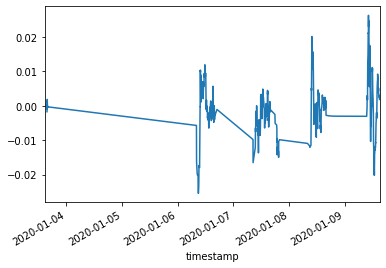

In [15]:
m[0].plot.line()

In [17]:
hist = MACD(minute_history["close"].dropna(), 40, 60)[0]

In [18]:
hist

timestamp
2020-01-03 14:46:00-05:00         NaN
2020-01-03 14:47:00-05:00         NaN
2020-01-03 14:49:00-05:00         NaN
2020-01-03 14:50:00-05:00         NaN
2020-01-03 15:01:00-05:00         NaN
                               ...   
2020-01-09 15:08:00-05:00   -0.000049
2020-01-09 15:09:00-05:00   -0.000229
2020-01-09 15:14:00-05:00   -0.000235
2020-01-09 15:15:00-05:00   -0.000319
2020-01-09 15:16:00-05:00   -0.000397
Length: 1000, dtype: float64

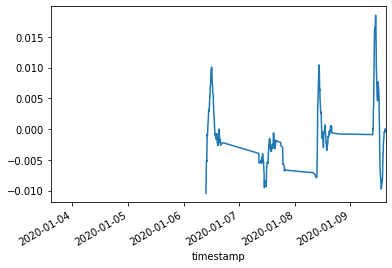

In [19]:
hist.plot.line()

In [20]:
if hist[-1] < 0 or np.diff(hist)[-1] < 0:
    print("no")

no


In [21]:
np.diff(hist)[-10:]

array([ 1.09757740e-04,  1.45968048e-04, -2.56688786e-05, -2.81157863e-06,
       -2.33610015e-05, -1.50406408e-05, -1.80092495e-04, -5.38795561e-06,
       -8.45496121e-05, -7.72776301e-05])

In [22]:
np.diff(hist)[-1]

-7.727763008613664e-05